# TensorFlow: Evaluating & Prediction

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

# Build Model

In [2]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [5]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [6]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

# Training

In [7]:
num_epochs = 1
batch_size = 64

In [9]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

938/938 [==============================] - 99s 105ms/step - loss: 0.4641 - accuracy: 0.8434


In [11]:
hist.history

{'loss': [0.21238861978054047], 'accuracy': [0.9315999746322632]}

# Evaluating  
- 학습한 모델 확인

In [10]:
# 98점 
model.evaluate(test_x, test_y, batch_size = batch_size)

157/157 [==============================] - 3s 18ms/step - loss: 0.0394 - accuracy: 0.9868


[0.03935226425528526, 0.9868000149726868]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [12]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [25]:
test_image = test_x[0,:,:,0]
test_image.shape

(28, 28)

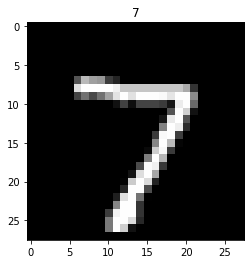

In [26]:
plt.imshow(test_image,'gray')
plt.title('7')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [22]:
# model에 넣을떄는 4차원 구조
pred = model.predict(test_image.reshape(1,28,28,1))

In [27]:
pred.shape

(1, 10)

In [ ]:
# 노드별 가장 높을값을 가지는 구간을 확인

In [28]:
# 7번째가 가장 높음
pred

array([[4.0823434e-09, 6.1587158e-10, 1.3661038e-07, 9.4793035e-07,
        4.5245675e-11, 7.0284045e-10, 1.1796884e-13, 9.9999845e-01,
        6.0569344e-10, 4.2299888e-07]], dtype=float32)

- np.argmax

In [29]:
np.argmax(pred)

7

## Test Batch

Batch로 Test Dataset 넣기

In [35]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [32]:
preds = model.predict(test_batch)

In [33]:
preds.shape

(32, 10)

- 결과 확인

In [39]:
# 32개의 이미지의 예측값
np.argmax(preds,-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

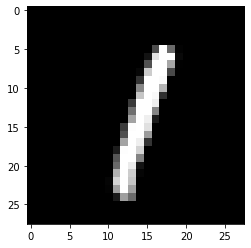

In [42]:
# np.argmax(preds,-1) 6번째 값 확인 
plt.imshow(test_batch[6-1,:,:,0],'gray')
plt.show()